In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold
%matplotlib inline

In [3]:
data = datasets.fetch_openml('mnist_784',
	version=1,
	return_X_y = True,as_frame=False)


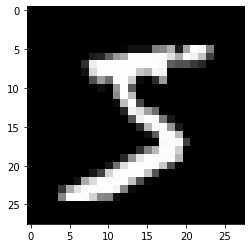

In [4]:
pixel_values, targets = data
targets = targets.astype(int)

single_image = pixel_values[:1].reshape(28,28)
plt.imshow(single_image,cmap='gray')

In [5]:
tsne = manifold.TSNE(n_components=2,random_state=2)
transformed_data = tsne.fit_transform(pixel_values[:3000,:])

/Users/thrilok/miniforge3/envs/ml/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/thrilok/miniforge3/envs/ml/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [6]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data,targets[:3000])),
	columns=["x","y","targets"])

tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)
tsne_df

x          y  targets
0    -29.974220   0.087737        5
1    -69.569000  -4.979408        0
2     19.229834 -45.101551        4
3     34.716503  38.532799        1
4     25.240389 -19.900370        9
...         ...        ...      ...
2995  54.540825  -4.804822        7
2996 -66.811523 -11.538313        0
2997  44.819553   0.038651        9
2998   7.350286   5.659636        1
2999 -11.170466  -7.969378        5

[3000 rows x 3 columns]

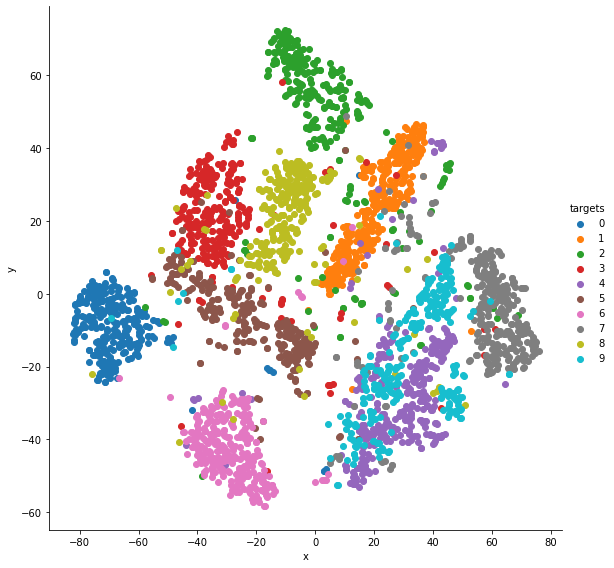

In [7]:
grid = sns.FacetGrid(tsne_df,hue="targets",height=8)
grid.map(plt.scatter,"x","y").add_legend()

In [8]:
from sklearn.datasets import load_wine

In [9]:
df = pd.read_csv("/Users/thrilok/Downloads/winequality-red.csv")
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In [10]:
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}
df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [11]:
# use frac=1 to shuffle the dat frame we reset the 
#indices since they change after shuffling the dataset
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.head(1000)

df_test = df.tail(599)

In [12]:
from sklearn import tree
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# this is our global size of label text
# on the plots
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)


In [13]:
# initialize lists to store accuracies
# for training and test sets
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

In [14]:
# iterate over a few depth values
for depth in range(1,25):
    
    #initilize decision tree classifier class
    # with max_depth of 3


    clf = tree.DecisionTreeClassifier(max_depth=depth)

    # choose the columns you want to train on
    # these are the features for the model
    cols = ['fixed acidity',
           'volatile acidity',
           'citric acid',
           'residual sugar',
           'chlorides',
           'free sulfur dioxide',
           'total sulfur dioxide',
           'density',
           'pH',
           'sulphates',
           'alcohol']

    # trian the model on the provided features
    # and mapped quality from before
    clf.fit(df_train[cols],df_train.quality)
    # generate predictions on the training set
    train_predictions = clf.predict(df_train[cols])

    # generate predictions on the test set
    test_predictions = clf.predict(df_test[cols]) 

    # calculate the accuracy of predictions on
    # training data set 
    train_accuracy = metrics.accuracy_score(
    df_train.quality,train_predictions)

    # claculate the accuracy of predictions on 
    # test data set
    test_accuracy = metrics.accuracy_score(
    df_test.quality,test_predictions)

    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

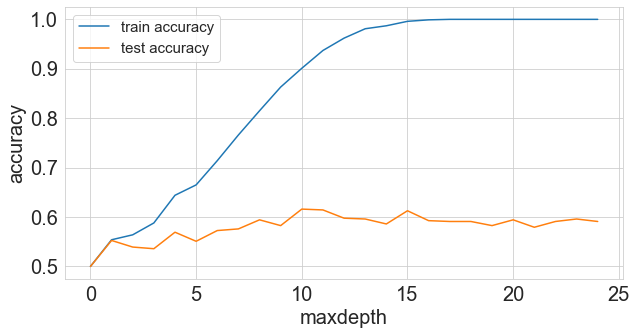

In [15]:
#create two plots using matplotlib
# and seaborn 

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label="train accuracy")
plt.plot(test_accuracies,label="test accuracy")
plt.legend(loc="upper left",prop={'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("maxdepth",size=20)
plt.ylabel("accuracy",size=20)
plt.show()

In [16]:
import pandas as pd
from sklearn import model_selection

In [17]:
# kfold cross validation
if __name__ =="__main__":
    
#     training data is in a csv file called train.csv
    df = pd.read_csv("/Users/thrilok/Downloads/winequality-red.csv")
    # we create a new column called a cross k-fold and fill it with -1
    df["kfold"] =-1
    df = df.sample(frac=1).reset_index(drop=True)
    
    # initialte the kfold class from model_selection module
    kf = model_selection.KFold(n_splits=5)
    
    # fill in the new kfold column
    for fold, (trn_,val_) in enumerate(kf.split(X=df)):
        df.loc[val_,'kfold'] = fold
    
    # save the new csv with kfold column
    df.to_csv("train_folds.csv",index=False)

In [18]:
# stratified kfold cross validation
if __name__ =="__main__":
    
#     training data is in a csv file called train.csv
    df = pd.read_csv("/Users/thrilok/Downloads/winequality-red.csv")
    # we create a new column called a cross k-fold and fill it with -1
    df["kfold"] = -1
    
    # the next step is to randomize the rows of the data 
    df = df.sample(frac=1).reset_index(drop=True)
    
    #fetch targets
    y = df.quality.values
    
    # initialte the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill in the new kfold column
    for f, (t_,v_) in enumerate(kf.split(X=df,y=y)):
        df.loc[val_,'kfold'] = f
    
    # save the new csv with kfold column
    df.to_csv("train_stratfolds.csv",index=False)

In [19]:
# stratfied-=kfold for regression

import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

In [20]:
def create_folds(data):
    # we create a new column called kfold ands fill it with -1
    data["kfold"] = -1
    
    # the next step is to randomize the rows of the data
    data = data.sample(frac=1).reset_index(drop=True)
    
    #calculate the number of bins by sturge's rule
    #i take the floor of the value, you can also
    #just round it
    num_bins = np.floor(1 + np.log2(len(data)))
    num_bins = num_bins.astype(int)
    
    # bin targets
    data.loc[:,"bins"] = pd.cut(
    data["target"],bins=num_bins,labels=False
    )
    
    # initiate the kfold class model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill the new kfold column
    # note that, instead of targets, we use bins!
    for f,(t_,v_) in enumerate(kf.split(X=data,y=data.bins.values)):
        data.loc[v_,'kfold'] = f
    
    # drop the bins column
    data = data.drop("bins", axis=1)
    
    # return dataframe with folds
    return data

if __name__ == "__main__":
    # we create a sample dataset with 15000 samples
    # and 100 features and 1 target
    X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1
    )
    # create a dataframe out of our numpy arrays
    df = pd.DataFrame(
    X,
    columns=[f"f_{i}" for i in range(X.shape[1])]
    )
    df.loc[:,"target"] = y
    
    # create folds
    df = create_folds(df)

/Users/thrilok/miniforge3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


In [22]:
def accuracy(y_true,y_pred):
    """
    Function to calculate accuracy
    :param y_true: list of true values
    :param y_pred": list of predicted values
    :return:accuracy score
    """
    
    # initialize a sample counter for correct predictions
    correct_counter = 0
    # loop over all elements of y_true
    # and y_pred "together"
    for yt, yp in zip(y_true,y_pred):
        if yt == yp:
            # if prediction is equal to truth, increase the counter
            correct_counter += 1
    #return accuracy
    #which is correct predictions over the number of samples
    return correct_counter / len(y_true)

In [23]:
def true_positive(y_true,y_pred):
    """
    Function to calculate True Positives
    :param y_true: list of true values
    :param y_pred:list of predicted values
    :return: number of true positives
    """
    
    #initialize
    tp = 0
    for yt, yp in zip(y_true,y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    """
    Function to calculate True negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of true negatives
    """
    
    #initialize
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    """
    Function to calculate False Postives
        :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false positives
    """
    # initialize
    fp = 0
    for yt, yp in zip(y_ture, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    """
    Function to calculate False negatives
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: number of false negatives
    """
    
    # initialize
    fn = 0
    for yt, yp in zip(y_true,y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn

In [24]:
def accuracy_v2(y_true, y_pred):
    """
    Function to calculate accuracy using tp/tn/fp/fn
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: accuracy score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    accuracy_score = (tp + tn) / (tp + tn + fp + fn)
    return accuracy

In [25]:
def precision(y_true, y_pred):
    """
    Function to calculate precision
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: precision score
    """
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp + fp)
    return precision

In [26]:
def recall(y_true, y_pred):
    """
    Function to calculate recall
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: recall score
    """
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall

In [27]:
def f1(y_true, y_pred):
    """
    Function to calculate f1 score
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: f1 score
    """
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    score = tp / (tp + fn)
    return score

In [28]:
def tpr(y_true, y_pred):
    """
    Function to calculate true postive rate
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: tpr / recall
    """
    return recall(y_true, y_pred)

In [29]:
def fpr(y_true, y_pred):
    """
    Function to calculate false postive rate
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: fpr
    """
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (tn + fp)

In [31]:
# Log Loss
import numpy as np

def log_loss(y_true, y_proba):
    """
    Function to calculate false postive rate
    :param y_true: list of true values
    :param y_proba: list of probabilities for 1
    :return: overall log loss
    """
    # define the epsilon value
    # this can also be an input
    # this value is used to clip probabilities
    epsilon = 1e-15
    # initialize empty list to store
    #individual losses
    loss = []
    # loop over all true and predicted probability values
    for yt, yp in zip(y_true, y_proba):
        # adjust probability
        # 0 gets converted to 1e-15
        # 1 get converted to 1-1e-15
        yp = np.clip(yp,epsilon, 1 - epsilon)
        # calculate loss for one sample
        temp_loss = - 1.0 * (yt * np.log(yp) + (1-yt) * np.log(1 - yp))
        
        # add to loss list
        loss. append(temp_loss)
        # return mean loss over all samples
    return np.mean(loss)

In [32]:
y_true = [0,0,0,0,1,0,1,0,0,1,0,1,0,0,1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

In [37]:
log_loss(y_true, y_proba)

0.49882711861432294

MACRO PRECISION

In [35]:
def macro_precision(y_true, y_pred):
    """
    Function to calculate macro average precision
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: macro precision score
    """
    # find the number of classes by talking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    # initialize precision to 0
    precision = 0
    
    # loop over all the classes
    for class_ in range(num_classes):
        
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate true positive for current class
        tp = true_positive(temp_true, temp_pred)
        
        # calculate false positive for current class
        fp = false_positive(temp_true, temp_pred)
        
        # calculate precision for current class
        temp_precision = tp / (tp + fp)
        
        #keep adding precision for all classes
        precision += temp_precision
    
    # calculate and return average precision over all classes
    precision /= num_classes
    return precision

MICRO PRECISION

In [36]:
def micro_precision(y_true, y_pred):
    """
    Function to calculate micro average precision
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: micro precision score
    """
    
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    
    # initialize tp and fp to 0
    tp = 0
    fp = 0
    
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate true positive for current class
        # and update overall tp
        tp += true_positive(temp_true, temp_pred)
        
        # calculate false positive for current class
        # and update overall fp
        fp += false_positive(temp_true, temp_pred)
        
    # calculate and return overall precision
    precision = tp /(tp + fp)
    return precision

WEIGHTED PRECISION

In [1]:
from collections import Counter

def weighted_precision(y_true, y_pred):
    """
    Function to calculate micro average precision
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: micro precision score
    """
    # find the number of classes by taking
    # length of unique values in true list
    num_classes = len(np.unique(y_true))
    
    # create class:sample count dictionary
    # it looks something like this
    # {0: 20, 1:15, 2:21}
    class_counts = counter(y_true)
    
    # initialize precision to 0
    precision = 0
    
    # loop over all classes
    
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate tp and fp for class
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        
        # calculate precision of class
        temp_precision = tp/(tp+ fp)
        
        # multiply precision with count of samples in class
        weighted_precision = class_counts[class_] * temp_precision
        
        # add to overall precision
        precision += weighted_precision
    
    # calculate overall precision by dividing by
    # total number of samples
    overall_precision = precision / len(y_true)
    return overall_precision

WEIGHTED f1

In [2]:
def weighted_f1(y_true, y_pred):
    """
    Function to calculate weighted f1 score
    :param y_true: list of true values
    :param y_proba: list of predicted values
    :return: weighted f1 score
    """
    
    # find the number of classes by taking
    #length of unique values in true_list
    num_classes = len(np.unique(y_true))
    
    # create class:sample count dictionary
    #it looks something like this:
    #{0:20,1:15,2:21}
    
    class_counts= Counter(y_true)
    
    #initialize f1 to 0
    f1 = 0
    
    # loop over all classes
    for class_ in range(num_classes):
        # all classes except current are considered negative
        temp_true = [1 if p == class_ else 0 for p in y_true]
        temp_pred = [1 if p == class_ else 0 for p in y_pred]
        
        # calculate precision and recall for class
        p = precision(temp_true, temp_pred)
        r = recall(temp_true, temp_ped)
        
        # calculate f1 of class
        if p + r != 0:
            temp_f1 = 2 * p * r / (p + r)
        else:
            temp_f1 = 0
        
        # multiply f1 with count of samples in class
        weighted_f1 = class_counts[class_] * temp_f1
        
        # add to f1 precision
        f1 += weighted_f1
        
        # calculate overall f1 divided by
        # total number of samples
        overall_f1 = f1/len(y_true)
        return overall_f1

Text(0.5, 50.5, 'Predicted Labels')

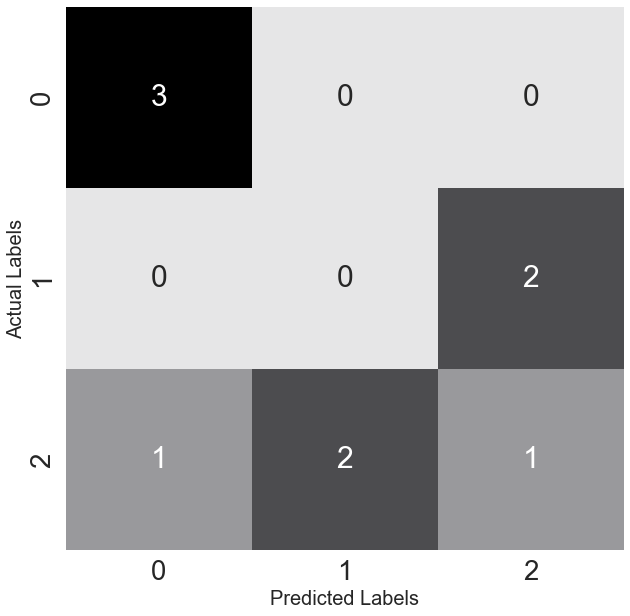

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# some targets
y_true = [ 0,1,2,0,1,2,0,2,2]

# some predictions
y_pred = [0,2,1,0,2,1,0,0,2]

# get confusion matrix from sklearn
cm = metrics.confusion_matrix(y_true, y_pred)

# plot using matplotlib and seaborn
plt.figure(figsize=(10,10))
cmap = sns.cubehelix_palette(50, hue=0.05,rot=0,light=0.9,dark=0,as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap,cbar=False)
plt.ylabel('Actual Labels',fontsize=20)
plt.xlabel('Predicted Labels', fontsize=20)

precision at k

In [8]:
def pk(y_true, y_pred):
    """
    Function to calculate precision at k
    :param y_true: list of values, actual classes
    :param y_proba: list of values, predicted classes
    :return: precision at a given value k
    """
    # if  k is 0, return 0. we should never have this
    # as k is always >= 1
    if k == 0:
        return 0
    # we are interested only in top-k predictions
    y_pred = y_pred[:k]
    #convert predictions to set
    pred_set = set(y_pred)
    #convert actual values to set
    true_set = set(y_true)
    # find common values
    common_values = pred_set.intersection(true_set)
    #return length of common values over k
    return len(common_values) / len(y_pred[:k])

average precision at k

In [10]:
def apk(y_true, y_pred):
    """
    Function to calculate average precision at k
    :param y_true: list of values, actual classes
    :param y_proba: list of values, predicted classes
    :return: average precision at a given value k
    """
    
    # initialize p @ k list of values
    pk_values = []
    # loop over all k. from 1 to k + 1
    for i in range(1,k+1):
        #calculate p@i and append to list
        pk_values.append(pk(y_true, y_pred,i))
    # if we have no values in the list, return 0
    if len(pk_values) == 0:
        return 0
    # else, we return the sum of list over length of list
    return sum(pk_values) / len(pk_values)

Mean average precision @ k

In [11]:
def mapk(y_true, y_pred):
    """
    Function to calculate mean average precision at k
    :param y_true: list of values, actual classes
    :param y_proba: list of values, predicted classes
    :return: mean average precision at a given value k
    """
    
    # initialize empty list for apk values
    apk_values = []
    # loop over all samples
    for i in range(len(y_true)):
        # store apk values for every sample
        apk_values.append(apk(y_true[i],y_pred[i],k=k))
    # return mean of apk values list
    return sum(apk_values) / len(apk_values)

In [12]:
def apk(actual, predicted,k =10):
    """
    computes the average precision at k.
    This function computes the AP at k between two lists of items
    parameters
    ---------
    actual : list
    A list of elements to be predicted (order doesn't matter)
    predicted: list
    A list of predicted elements(order does matter)
    k: int, optional
    The maximum number of predicted elements
    returns
    -------
    score: double
    The average precision at k over the input lists
    """
    
    if len(predicted) > k:
        predicted = predicted[:k]
    
    score = 0.0
    num_hits = 0.0
    for i,p in enumerate(predicted):
        if p in actual  and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i + 1.0)
    
    if not actual:
        return 0.0
    
    return score / min(len(actual),k)

Mean absolute error

In [13]:
def mean_absolute_error(y_true, y_pred):
    """
    This function calculates mae
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean absolute error
    """
    
    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate absolute error
        # and add to error
        error += np.abs(yt - yp)
    # return mean error
    return error / len(y_true)

Mean squared error

In [14]:
def mean_squared_error(y_true, y_pred):
    """
    This function calculates mse
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean squared error
    """
    
    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared error
        # and add to error
        error += (yt - yp) ** 2
    # return mean error
    return error / len(y_true)

Mean squared logarithmic error

In [16]:
def mean_squared_log_error(y_true, y_pred):
    """
    This function calculates msle
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean squared logarithmic error
    """
    
    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate squared log error
        # and add to error
        error += (np.log(1+yt) - np.log(1 + yp)) ** 2
    # return mean error
    return error / len(y_true)

Percentage error

In [17]:
def mean_percentage_error(y_true, y_pred):
    """
    This function calculates mpe
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean percentage error
    """
    
    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate percentage error
        # and add to error
        error += (yt - yp) / yt
    # return mean error
    return error / len(y_true)

Mean absolute percentage error

In [18]:
def mean_absolute_percentage_error(y_true, y_pred):
    """
    This function calculates mape
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: mean absolute percentage error
    """
    
    # initialize error at 0
    error = 0
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # calculate percentage error
        # and add to error
        error += np.abs(yt - yp) / yt
    # return mean percentage error
    return error / len(y_true)

R - squared

In [19]:
def r2(y_true, y_pred):
    """
    This function calculates r-squared score
    :param y_true: list of real numbers, true values
    :param y_pred: list of real numbers, predicted values
    :return: r2 score
    """
    
    # calculate the mean vlaue of true values
    mean_true_value = np.mean(y_true)
    
    # initialize numerator with 0
    numerator = 0
    # initialize denominator with 0
    denominator = 0
    
    # loop over all samples in the true and predicted list
    for yt, yp in zip(y_true, y_pred):
        # update numerator
        numerator += (yt - yp) ** 2
        # update denominator
        denominator += (yt - mean_true_value) ** 2
    
    # calculate the ratio
    ratio = numerator /denominator
    
    # return mean percentage error
    return 1 - ratio

you can make most them in a very efficient manner by properly using numpy

In [20]:
def mae_np(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [22]:
from sklearn import metrics

y_true = [1,2,3,1,2,3,1,2,3]
y_pred = [2,1,3,1,2,3,3,1,2]

print(metrics.cohen_kappa_score(y_true, y_pred, weights = "quadratic"))

metrics.accuracy_score(y_true, y_pred)

0.33333333333333337


0.4444444444444444

Matthew's Correlation coefficeint mcc

In [23]:
def mcc(y_true, y_pred):
    """
    This function calculates matthew's correlation coefficient
    for binary classification
    :param y_true: list of true values
    :param y_pred: list of predicted values
    :return: mcc score
    """
    
    tp = true_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    
    numerator = (tp * tn) - (fp * fn)
    
    denominator = (
    (tp + fp) *
    (fn + tn) * 
    (fp + tn) * 
    (tp + fn)
    )
    
    denominator = denominator ** 0.5
    return numerator /denominator

In [4]:
import numpy as np
from scipy import sparse

example = np.array(
    [
[0,0,0,0,1,0],
[0,1,0,0,0,0],
[1,0,0,0,0,0]
    ])

# sparse_example = sparse.csr_matrix(example)

# print(sparse_example.data.nbytes)
print(f"size of dense array: {example.nbytes}")

sparse_example = sparse.csr_matrix(example)

print(f"size of sparse array: {sparse_example.data.nbytes}")

full_size  = (
sparse_example.data.nbytes + 
sparse_example.indptr.nbytes + 
sparse_example.indices.nbytes)

# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

size of dense array: 144
size of sparse array: 24
Full size of sparse array: 52


In [3]:
n_rows = 10000
n_cols = 100000

# create random binary matrix with only 5% values as 1s
example = np.random.binomial(1, p =0.05,size = (n_rows, n_cols))

print(f"size of dense array: {example.nbytes}")

sparse_example = sparse.csr_matrix(example)

print(f"size of sparse array: {sparse_example.data.nbytes}")

full_size  = (
sparse_example.data.nbytes + 
sparse_example.indptr.nbytes + 
sparse_example.indices.nbytes)

# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

size of dense array: 8000000000
size of sparse array: 400005304
Full size of sparse array: 600047960


In [7]:
from sklearn import preprocessing

# create random 1-d array with 1001 different categories (int)
example = np.random.randint(1000, size=1000000)

# initialize Onehotencoder from scikit-learn
# keep sparse. = False to get dense array

ohe = preprocessing.OneHotEncoder(sparse = False)

#fit and transform data with dense one hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1,1))

#print size in bytes for dense array
print(f"size of dense array : {ohe_example.nbytes}")

# initialize OneHotEncoder from scikit-learn
# keep sparse = True to get sparse array
ohe = preprocessing.OneHotEncoder(sparse=True)

# fit and transform data with sparse one-hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1,1))

#print size in bytes for dense array
print(f"size of dense array : {ohe_example.data.nbytes}")

full_size = (
ohe_example.data.nbytes + 
ohe_example.indptr.nbytes + ohe_example.indices.nbytes)

# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

size of dense array : 8000000000
size of dense array : 8000000
Full size of sparse array: 16000004


In [2]:
import pandas as pd
from sklearn import model_selection
if __name__ =="__main__":
    
#     training data is in a csv file called train.csv
    df = pd.read_csv("/Users/thrilok/Downloads/cat_train.csv")
    # we create a new column called a cross k-fold and fill it with -1
    df["kfold"] =-1
    df = df.sample(frac=1).reset_index(drop=True)
    
    y = df.target.values
    
    # initialte the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill in the new kfold column
    for f, (trn_,val_) in enumerate(kf.split(X=df,y=y)):
        df.loc[val_,'kfold'] = f
    
    # save the new csv with kfold column
    df.to_csv("/Users/thrilok/Downloads/cat_train_folds.csv",index=False)

In [2]:
import xgboost as xgb
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing

def run(fold):
    
    # load the full training data with folds
    df = pd.read_csv("/Users/thrilok/Downloads/cat_train_folds.csv")
    features = [
        f for f in df.columns if f not in ("id","target","kfold")
    ]
    
    # fill all NaN values with None
    # Note that i am converting all columns to strings
    # it doesn't matter because all are categories
    for col in features:
        df.loc[:,col] = df[col].astype(str).fillna("NONE")
        
    
    #  now it's time to label encode the features
    for col in features:
        
        # initialize LabelEncoder for each feature column
        lbl = preprocessing.LabelEncoder()
        
        # fit label encoder on all data
        lbl.fit(df[col])
        # transform all the data
        
        df.loc[:,col] = lbl.transform(df[col])
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    # get training data
    x_train = df_train[features].values
    
    # get validation data
    x_valid = df_valid[features].values
    
    # initialize xgboostmodel
    model = xgb.XGBClassifier(n_jobs=1,
                             max_depth=7,
                             n_estimators=200)
    
    # fit model on training data (ohe)
    model.fit(x_train, df_train.target.values)
    
    #predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:,1]
    
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.target.values,valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")

if __name__ == "__main__":
    for fold in range(5):
        run(fold)

/Users/thrilok/miniforge3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:20:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold = 0, AUC = 0.7621726157391542


/Users/thrilok/miniforge3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:22:32] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold = 1, AUC = 0.7633425694995253


/Users/thrilok/miniforge3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:24:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold = 2, AUC = 0.76062756313253


/Users/thrilok/miniforge3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:25:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold = 3, AUC = 0.7606448818127229


/Users/thrilok/miniforge3/envs/ml/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:27:33] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Fold = 4, AUC = 0.7636750218949035


In [4]:
%timeit
import pandas as pd
from sklearn import model_selection
if __name__ =="__main__":
    
#     training data is in a csv file called train.csv
    df = pd.read_csv("/Users/thrilok/Downloads/adult.csv")
    # we create a new column called a cross k-fold and fill it with -1
    df["kfold"] =-1
    df = df.sample(frac=1).reset_index(drop=True)
    
    y = df.income.values
    
    # initialte the kfold class from model_selection module
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill in the new kfold column
    for f, (trn_,val_) in enumerate(kf.split(X=df,y=y)):
        df.loc[val_,'kfold'] = f
    
    # save the new csv with kfold column
    df.to_csv("/Users/thrilok/Downloads/adult_folds.csv",index=False)